In [1]:
from tqdm import tqdm
from glob import glob
import numpy as np
import os
from utils.process_data import split_train_val, get_data_properties
from utils.generate_crops import *
from multiprocessing import Pool

import json

/Users/faruk92/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = '../Datasets'
project_name = '20220719'
if os.path.exists(os.path.join(data_dir,project_name)):
    print("`{}` is choosen as datapath".format(os.path.join(data_dir,project_name)))

`../Datasets/20220719` is choosen as datapath


100%|██████████| 24/24 [01:02<00:00,  2.60s/it]


Number of instances per class
 {'Background': 19646104, 'Steel(B)': 976075, 'Steel(D)': 1512123, 'NiNet': 2328494, 'HTEL(B)': 434557, 'HTEL(D)': 268471}


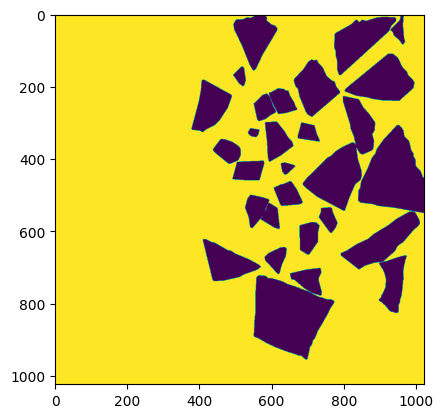

In [3]:
data_properties_dir = get_data_properties(data_dir, project_name, train_val_name=['train', 'val'])


In [9]:
# n_sigma is used to control the size of crop
n_sigma = 5


def round_up_8(x):
    return (x.astype(int)+7) & (-8)


crops_dir = '../crops/'
data_subsets = ['train', 'val'] 
crop_size =416
# crop_size = np.maximum(round_up_8(data_properties_dir['avg_object_size_y'] + n_sigma*data_properties_dir['stdev_object_size_y']),
# round_up_8(data_properties_dir['avg_object_size_x'] + n_sigma*data_properties_dir['stdev_object_size_x']))
print("Crop size in x and y will be set equal to {}".format(crop_size))



Crop size in x and y will be set equal to 416


In [11]:
import itertools


for data_subset in data_subsets:
    image_dir = os.path.join(data_dir, project_name, data_subset, 'images')
    instance_dir = os.path.join(data_dir, project_name, data_subset,'instances')
    classmap_dir = os.path.join(data_dir, project_name, data_subset,'classmaps')
    hs_dir = os.path.join(data_dir, project_name, data_subset,'hs')
    
    
    
    
    image_names = sorted(glob.glob(os.path.join(image_dir, '*.png'))) 
    instance_names = sorted(glob.glob(os.path.join(instance_dir, '*.png')))
    classmap_names = sorted(glob.glob(os.path.join(classmap_dir, '*.png')))
    hs_names = sorted(glob.glob(os.path.join(hs_dir, '*.cue')))
    header_names = sorted(glob.glob(os.path.join(hs_dir, '*.hdr')))
    crop_size_iter = list(itertools.repeat(crop_size,len(image_names)))
    crop_dir_iter = list(itertools.repeat(os.path.join(crops_dir,'H2giga'),len(image_names)))
    type_iter = list(itertools.repeat(data_subset,len(image_names)))

    
    item = zip(image_names,instance_names,classmap_names,hs_names,header_names,crop_size_iter,crop_dir_iter,type_iter)
    
    with Pool(2) as p:
        max_ = len(image_names)
        with tqdm(total=max_) as pbar:
            for _ in p.imap_unordered(process_with_pool, item):
                pbar.update()
        # shutdown the process pool
        p.close()
        # wait for all issued task to complete
        p.join()

  0%|          | 0/1 [00:00<?, ?it/s]/Users/faruk92/miniconda3/lib/python3.9/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
  0%|          | 0/1 [00:00<?, ?it/s]/Users/faruk92/miniconda3/lib/python3.9/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
100%|██████████| 1/1 [01:54<00:00, 114.36s/it]
